In [2]:
# %jsroot on
import ROOT
import uproot

Welcome to JupyROOT 6.22/02


In [3]:
%%time
rootFile=ROOT.TFile('/home/hashmi/Files/DataFolder/DD_comb_brunel.root')
tree=rootFile.Get('Particle_Data')

CPU times: user 223 ms, sys: 33.6 ms, total: 256 ms
Wall time: 345 ms


Warning in <TClass::Init>: no dictionary for class LHCb::MCProperty is available
Warning in <TClass::Init>: no dictionary for class DataObject is available


In [4]:
variables=['track_charge','track_chi2','track_chi2PerDoF','track_nLHCbIDs','track_p','track_phi','track_position_x',
           'track_position_y','track_position_r','track_pt','track_tx','track_ty','track_pseudoRapidity',
           'particle_hasScifi','particle_hasUT','particle_hasVelo','particle_isDown','particle_isDown_noVelo','particle_isLong',
           'particle_isLong_andUT','partiole_isElectron']


features=['track_charge','track_chi2','track_chi2PerDoF','track_nLHCbIDs','track_p','track_phi','track_position_x',
           'track_position_y','track_position_r','track_pt','track_tx','track_ty','track_pseudoRapidity']


tracks=['particle_hasScifi','particle_hasUT','particle_hasVelo','particle_isDown','particle_isDown_noVelo','particle_isLong',
           'particle_isLong_andUT','partiole_isElectron']

In [5]:
data=uproot.open('/home/hashmi/Files/DataFolder/DD_comb_brunel.root:Particle_Data')
data=data.arrays(variables,library='pd')

In [6]:
data.describe()

,track_charge,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_x,track_position_y,track_position_r,track_pt,track_tx,track_ty,track_pseudoRapidity
count,962037.000000,962037.000000,962037.000000,962037.000000,9.620370e+05,962037.000000,962037.000000,962037.000000,962037.000000,9.620370e+05,962037.000000,962037.000000,962037.000000
mean,0.024840,3.826665,0.595674,11.495860,1.370779e+04,-0.006624,11.843126,0.392187,7550.633087,1.617729e+03,0.009298,0.000002,2.454531
std,0.999692,3.202534,0.508504,0.705124,1.362286e+06,2.042809,749.540920,451.849878,63.714324,2.777336e+05,0.297658,0.058286,0.843483
min,-1.000000,0.015710,0.003028,9.000000,1.160603e+03,-3.141592,-2680.596680,-2035.376831,7500.000591,5.974027e-01,-1.059994,-0.341174,0.808248
25%,-1.000000,1.578525,0.242978,11.000000,3.469218e+03,-1.254586,-438.692810,-193.443069,7506.367689,1.029449e+03,-0.170440,-0.026353,1.767935
50%,1.000000,2.862060,0.440470,12.000000,6.289909e+03,0.000553,18.145897,1.542991,7523.504503,1.173962e+03,0.014578,0.000061,2.366156
75%,1.000000,5.070905,0.784443,12.000000,1.283023e+04,1.129992,466.525330,193.922165,7571.740754,1.397154e+03,0.189710,0.026286,3.053541
max,1.000000,38.030360,6.210412,12.000000,1.324549e+09,3.141589,2665.333740,2048.120605,8138.707470,2.723039e+08,1.034878,0.347731,9.490505


In [7]:
lower=[]
upper=[]
for i in features:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    lower.append(q1-(1.5*iqr))
    upper.append(q3+(1.5*iqr))

In [8]:
import pandas as pd
bounds=pd.DataFrame(index=features)
bounds['LowerValue']=lower
bounds['UpperValue']=upper
bounds=bounds.T

In [9]:
bounds

,track_charge,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_x,track_position_y,track_position_r,track_pt,track_tx,track_ty,track_pseudoRapidity
LowerValue,-4.0,-3.660045,-0.569219,9.5,-10572.292333,-4.831455,-1796.520020,-774.490921,7408.308092,477.890515,-0.710666,-0.105311,-0.160473
UpperValue,4.0,10.309475,1.596640,13.5,26871.735907,4.706860,1824.352539,774.970016,7669.800351,1948.712171,0.729935,0.105244,4.981950


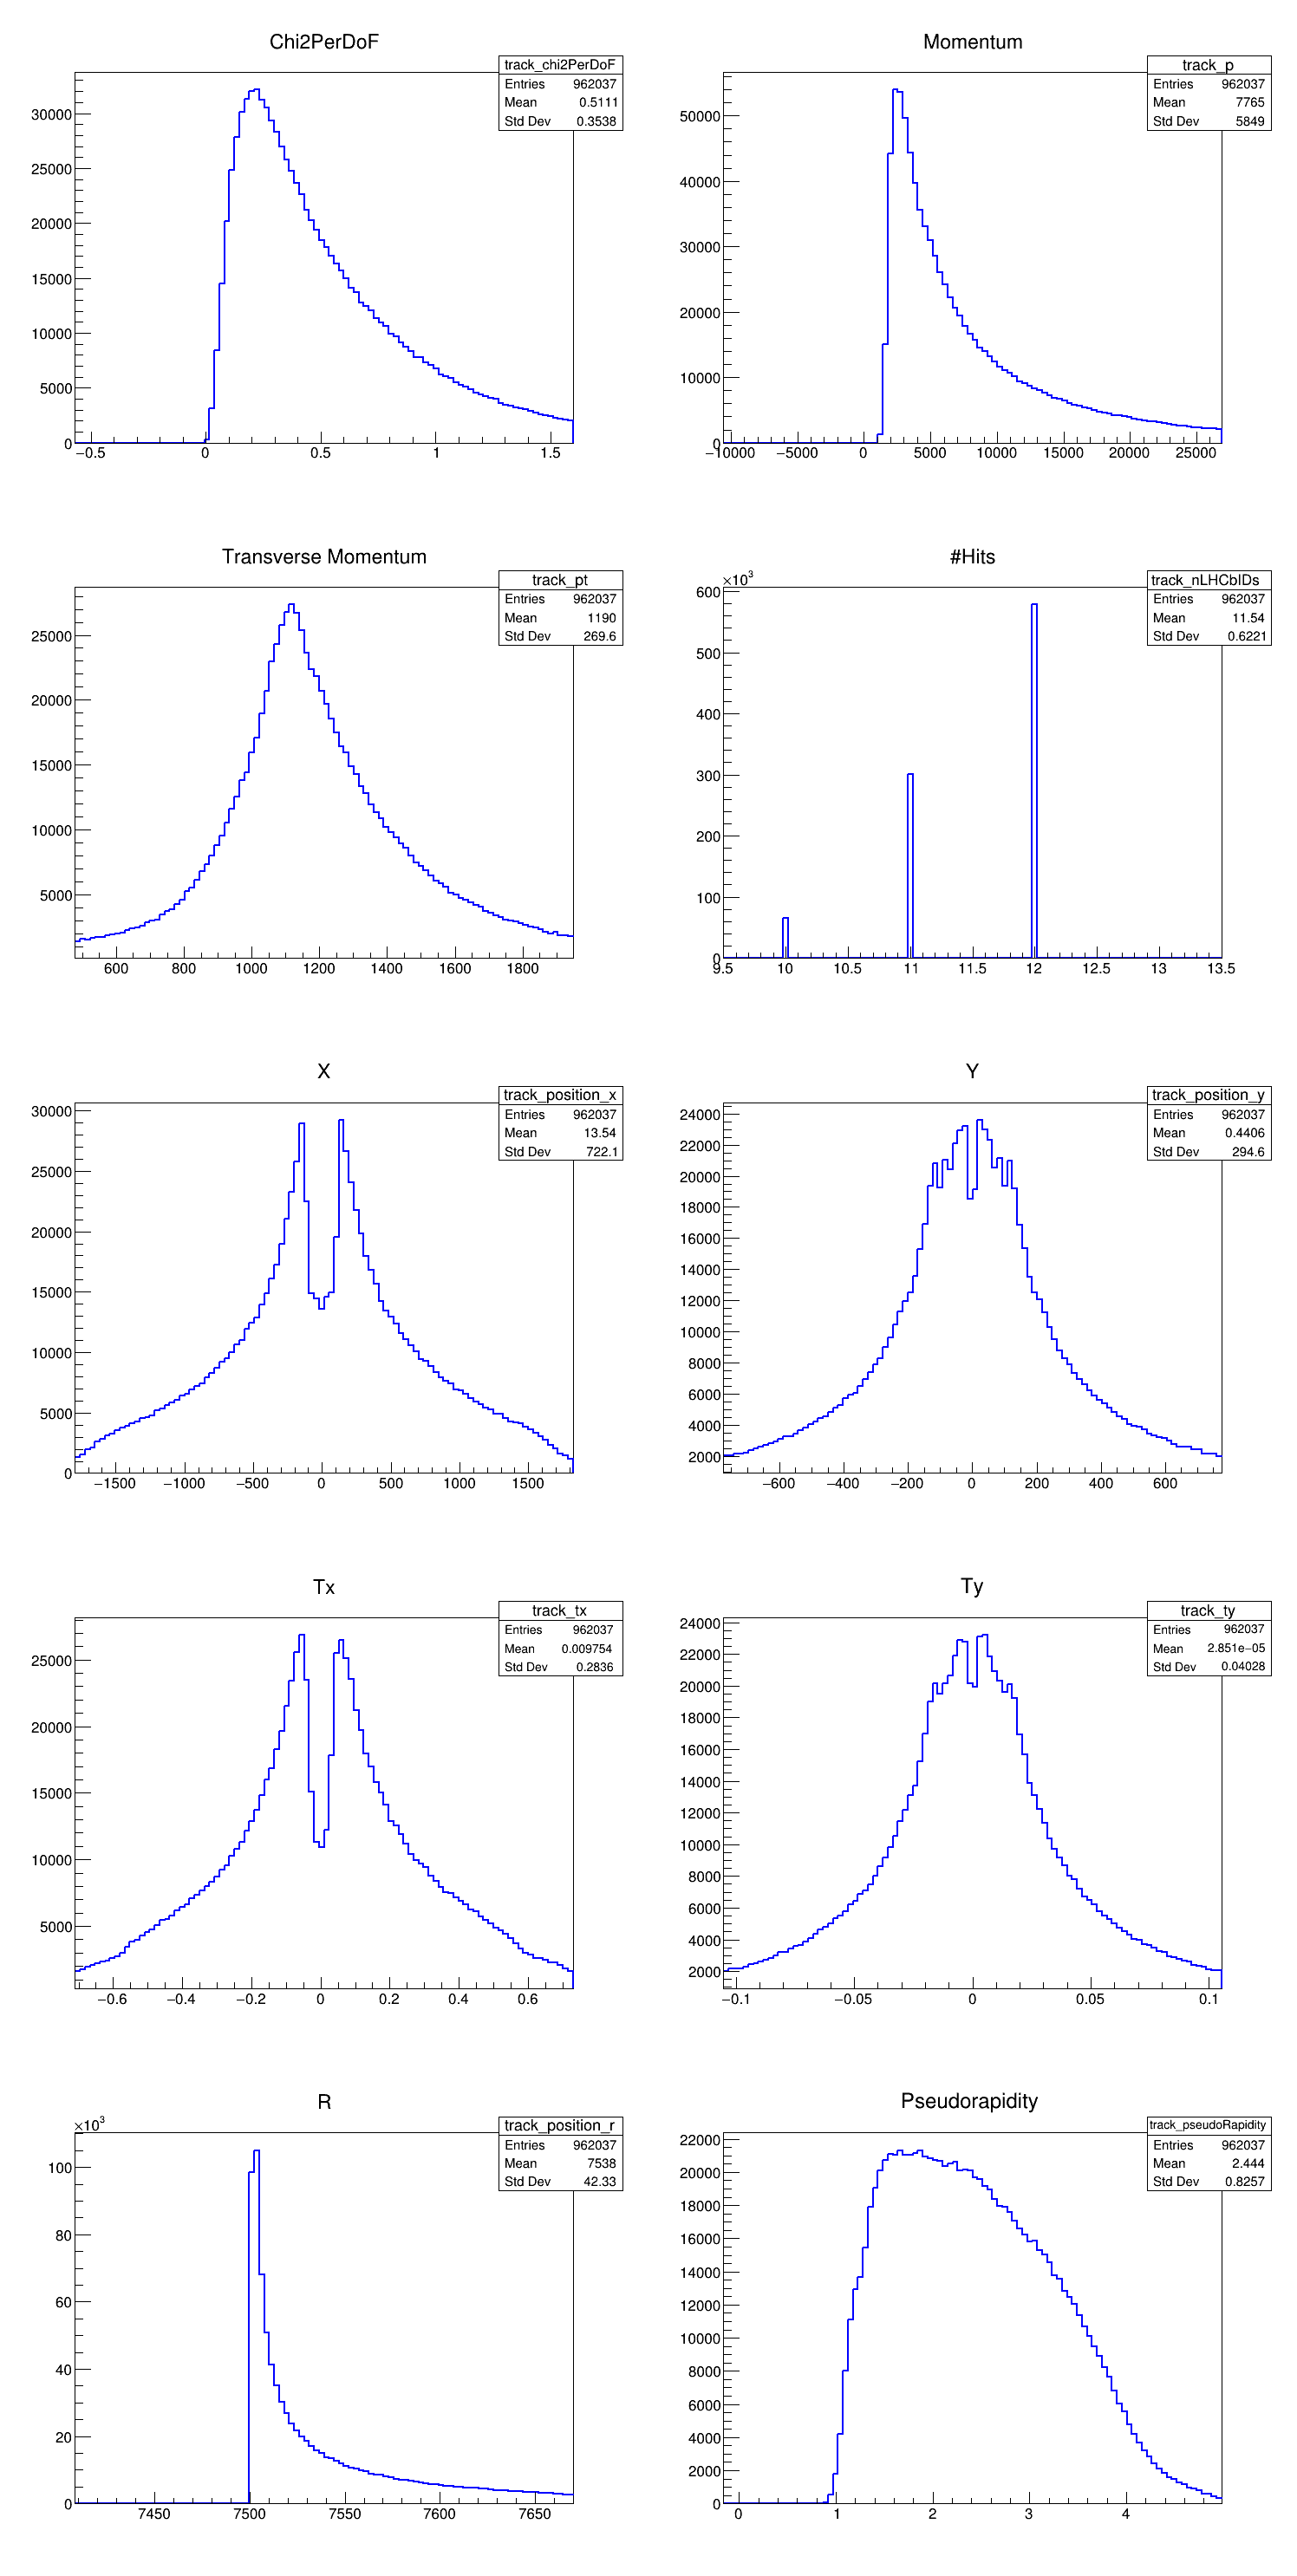

In [9]:
canvas = ROOT.TCanvas('Canvas','Canvas',1500,3000)
canvas.Divide(2,5)


chi2perdof = ROOT.TH1D("track_chi2PerDoF",'Chi2PerDoF',100,bounds['track_chi2PerDoF'][0],bounds['track_chi2PerDoF'][1]);
p = ROOT.TH1D("track_p",'Momentum',100,bounds['track_p'][0],bounds['track_p'][1]);
pt = ROOT.TH1D("track_pt",'Transverse Momentum',100,bounds['track_pt'][0],bounds['track_pt'][1]);
nLHCbIDs = ROOT.TH1D("track_nLHCbIDs",'#Hits',100,bounds['track_nLHCbIDs'][0],bounds['track_nLHCbIDs'][1]);
x = ROOT.TH1D("track_position_x",'X',100,bounds['track_position_x'][0],bounds['track_position_x'][1]);
y = ROOT.TH1D("track_position_y",'Y',100,bounds['track_position_y'][0],bounds['track_position_y'][1]);
tx = ROOT.TH1D("track_tx",'Tx',100,bounds['track_tx'][0],bounds['track_tx'][1]);
ty = ROOT.TH1D("track_ty",'Ty',100,bounds['track_ty'][0],bounds['track_ty'][1]);
r = ROOT.TH1D("track_position_r",'R',100,bounds['track_position_r'][0],bounds['track_position_r'][1]);
pseudorapidity = ROOT.TH1D("track_pseudoRapidity",'Pseudorapidity',100,bounds['track_pseudoRapidity'][0],bounds['track_pseudoRapidity'][1]);

for event in tree:
    chi2perdof.Fill(event.track_chi2PerDoF)
    p.Fill(event.track_p)
    pt.Fill(event.track_pt)
    nLHCbIDs.Fill(event.track_nLHCbIDs)
    x.Fill(event.track_position_x)
    y.Fill(event.track_position_y)
    tx.Fill(event.track_tx)
    ty.Fill(event.track_ty)
    r.Fill(event.track_position_r)
    pseudorapidity.Fill(event.track_pseudoRapidity)
    
canvas.cd(1)
chi2perdof.SetLineColor(4)
chi2perdof.SetLineWidth(2)
chi2perdof.Draw()


canvas.cd(2)
p.SetLineColor(4)
p.SetLineWidth(2)
p.Draw()

canvas.cd(3)
pt.SetLineColor(4)
pt.SetLineWidth(2)
pt.Draw()


canvas.cd(4)
nLHCbIDs.SetLineColor(4)
nLHCbIDs.SetLineWidth(2)
nLHCbIDs.Draw()

canvas.cd(5)
x.SetLineColor(4)
x.SetLineWidth(2)
x.Draw()

canvas.cd(6)
y.SetLineColor(4)
y.SetLineWidth(2)
y.Draw()

canvas.cd(7)
tx.SetLineColor(4)
tx.SetLineWidth(2)
tx.Draw()

canvas.cd(8)
ty.SetLineColor(4)
ty.SetLineWidth(2)
ty.Draw()

canvas.cd(9)
r.SetLineColor(4)
r.SetLineWidth(2)
r.Draw()

canvas.cd(10)
pseudorapidity.SetLineColor(4)
pseudorapidity.SetLineWidth(2)
pseudorapidity.Draw()



canvas.Draw()

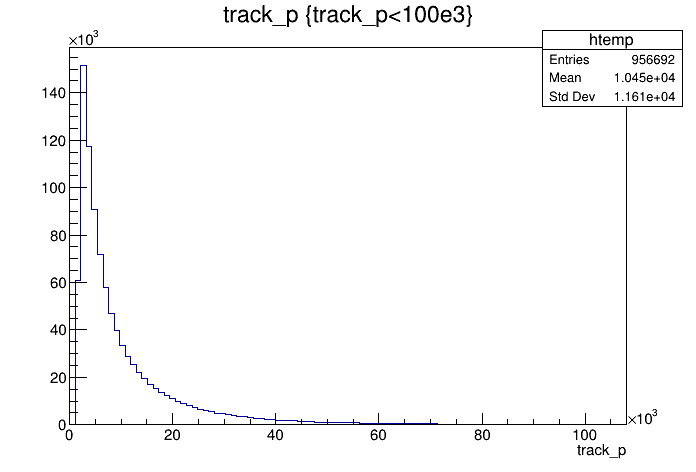

In [26]:
canvas1=ROOT.TCanvas()
tree.Draw('track_p','track_p<100e3')
canvas1.Draw()

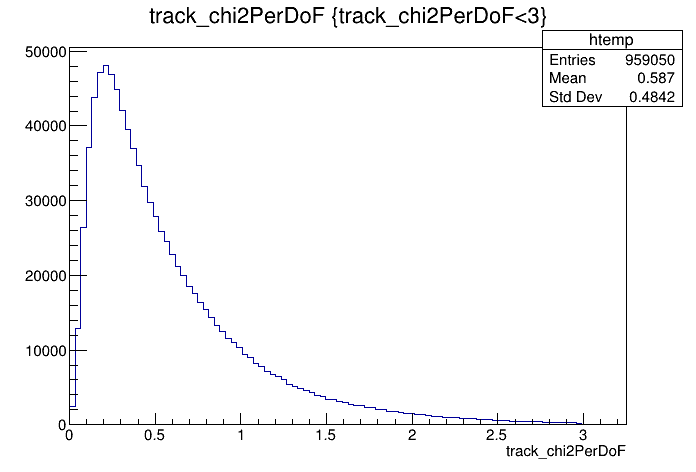

In [11]:
canvas1=ROOT.TCanvas()
tree.Draw('track_chi2PerDoF','track_chi2PerDoF<3')
canvas1.Draw()

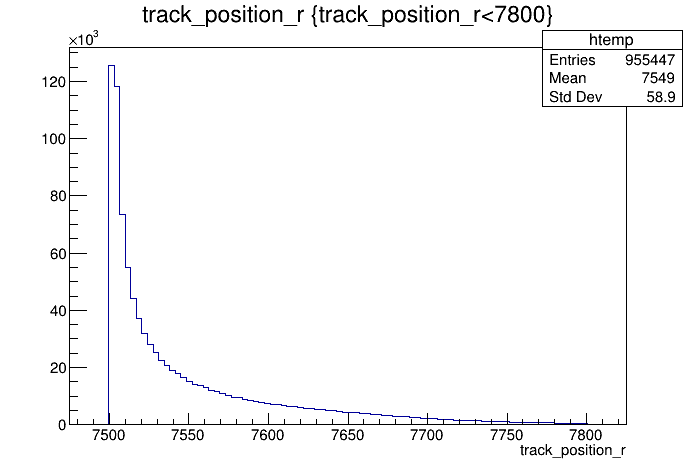

In [12]:
canvas1=ROOT.TCanvas()
tree.Draw('track_position_r','track_position_r<7800')
canvas1.Draw()

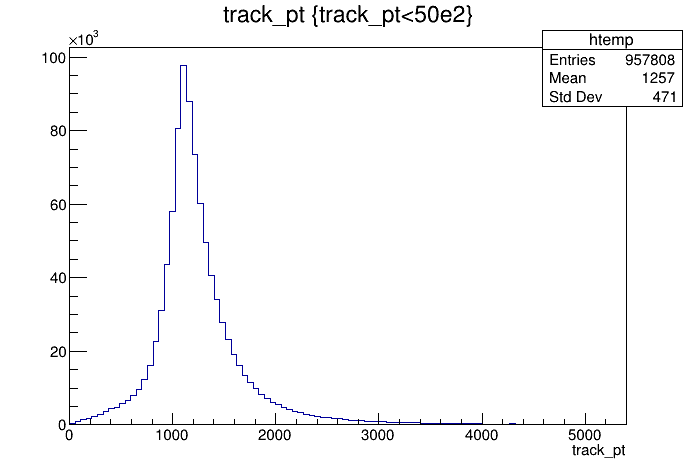

In [17]:
canvas1=ROOT.TCanvas()
tree.Draw('track_pt','track_pt<50e2')
canvas1.Draw()

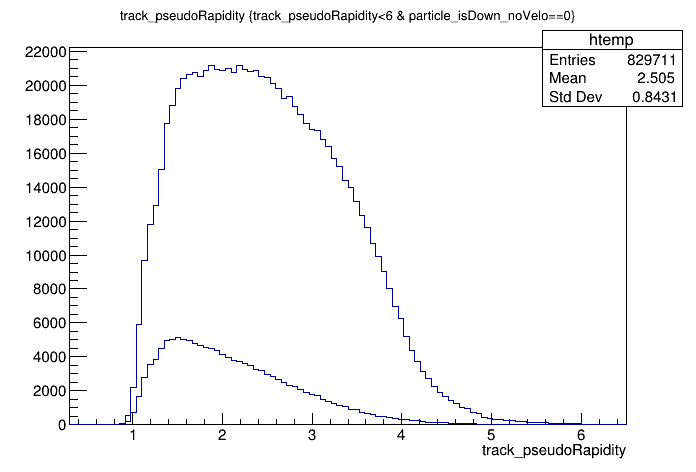

In [23]:
canvas1=ROOT.TCanvas()
tree.Draw('track_pseudoRapidity','track_pseudoRapidity<6 & particle_isDown_noVelo==0')
tree.Draw('track_pseudoRapidity','track_pseudoRapidity<6 & particle_isDown_noVelo==1','SAME')
canvas1.Draw()